# Pandas

In [1]:
import pandas as pd
import numpy as np

## pd.Series
Тип данных представляющий одномерный набор данных

In [2]:
some_list = [1, 3, 5, np.nan, 6, 8]
ser1 = pd.Series(some_list)
ser1

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

ser1 имеет тип float64 из-зa np.nan, т.к. np.nan имеет тип float64, а pd.Series работает только с однородными данными

In [3]:
# Так же можно в явном виде указать индексы, чтобы потом было более удобно обращаться к элементам
ind = ['1st day', '2nd day', '3rd day', '4th day', '5th day', '6th day']

ser2 = pd.Series(some_list, index=ind)
ser2

1st day    1.0
2nd day    3.0
3rd day    5.0
4th day    NaN
5th day    6.0
6th day    8.0
dtype: float64

In [4]:
ser2['4th day']

nan

In [5]:
# можно дать имя pd.Series
ser3 = pd.Series(some_list, index=ind, name='Temperature')
ser3

1st day    1.0
2nd day    3.0
3rd day    5.0
4th day    NaN
5th day    6.0
6th day    8.0
Name: Temperature, dtype: float64

## Индексирование

с индексами можно работать так же, как и в случае с обычными list

In [7]:
print(ser3[0])
print('-----')
print(ser3[1:3])
print('-----')
print(ser3[::-1])

1.0
-----
2nd day    3.0
3rd day    5.0
Name: Temperature, dtype: float64
-----
6th day    8.0
5th day    6.0
4th day    NaN
3rd day    5.0
2nd day    3.0
1st day    1.0
Name: Temperature, dtype: float64


Индексирование pd.Series по условиям

In [11]:
date_range = pd.date_range('20190101', periods=10) # Диапозон дат
ser4 = pd.Series(np.random.rand(10), index=date_range)
ser4

2019-01-01    0.589079
2019-01-02    0.632738
2019-01-03    0.338079
2019-01-04    0.386833
2019-01-05    0.727474
2019-01-06    0.368426
2019-01-07    0.804247
2019-01-08    0.876143
2019-01-09    0.495883
2019-01-10    0.679398
Freq: D, dtype: float64

In [12]:
ser4 > 0.5

2019-01-01     True
2019-01-02     True
2019-01-03    False
2019-01-04    False
2019-01-05     True
2019-01-06    False
2019-01-07     True
2019-01-08     True
2019-01-09    False
2019-01-10     True
Freq: D, dtype: bool

В качестве индекса можно указать выражение, и нам будут возвращены только те элементы, для которых значение является True

In [14]:
ser4[ser4 > 0.5]

2019-01-01    0.589079
2019-01-02    0.632738
2019-01-05    0.727474
2019-01-07    0.804247
2019-01-08    0.876143
2019-01-10    0.679398
dtype: float64

In [15]:
ser4[(ser4 > 0.6) | (ser4 < 0.2)]

2019-01-02    0.632738
2019-01-05    0.727474
2019-01-07    0.804247
2019-01-08    0.876143
2019-01-10    0.679398
dtype: float64

In [16]:
ser4[(ser4 > 0.6) & (ser4 < 0.2)]

Series([], Freq: D, dtype: float64)

## Сортировки
Тип pd.Series можно отсортиовать как по значениям, так и по индексу

In [17]:
ser4.sort_index()

2019-01-01    0.589079
2019-01-02    0.632738
2019-01-03    0.338079
2019-01-04    0.386833
2019-01-05    0.727474
2019-01-06    0.368426
2019-01-07    0.804247
2019-01-08    0.876143
2019-01-09    0.495883
2019-01-10    0.679398
Freq: D, dtype: float64

In [18]:
ser4.sort_values()

2019-01-03    0.338079
2019-01-06    0.368426
2019-01-04    0.386833
2019-01-09    0.495883
2019-01-01    0.589079
2019-01-02    0.632738
2019-01-10    0.679398
2019-01-05    0.727474
2019-01-07    0.804247
2019-01-08    0.876143
dtype: float64

In [19]:
# Сортировки по умолчанию не сохраняют результат
ser4

2019-01-01    0.589079
2019-01-02    0.632738
2019-01-03    0.338079
2019-01-04    0.386833
2019-01-05    0.727474
2019-01-06    0.368426
2019-01-07    0.804247
2019-01-08    0.876143
2019-01-09    0.495883
2019-01-10    0.679398
Freq: D, dtype: float64

In [20]:
ser4 = ser4.sort_values()
ser4

2019-01-03    0.338079
2019-01-06    0.368426
2019-01-04    0.386833
2019-01-09    0.495883
2019-01-01    0.589079
2019-01-02    0.632738
2019-01-10    0.679398
2019-01-05    0.727474
2019-01-07    0.804247
2019-01-08    0.876143
dtype: float64

## Операции с series
Тип pd.Series можно модифицировать проще, чем стандартный list из Python

In [21]:
ser4 + 100

2019-01-03    100.338079
2019-01-06    100.368426
2019-01-04    100.386833
2019-01-09    100.495883
2019-01-01    100.589079
2019-01-02    100.632738
2019-01-10    100.679398
2019-01-05    100.727474
2019-01-07    100.804247
2019-01-08    100.876143
dtype: float64

In [22]:
np.exp(ser4)

2019-01-03    1.402252
2019-01-06    1.445457
2019-01-04    1.472310
2019-01-09    1.641948
2019-01-01    1.802328
2019-01-02    1.882758
2019-01-10    1.972689
2019-01-05    2.069845
2019-01-07    2.235012
2019-01-08    2.401619
dtype: float64

In [24]:
term1 = pd.Series(np.random.randint(0, 10, 5))
term2 = pd.Series(np.random.randint(0, 10, 6))
term1 + term2 # np.nan + какое-то число = np.nan

0     2.0
1    10.0
2    10.0
3    10.0
4    13.0
5     NaN
dtype: float64

In [25]:
term1.shape # число строк в pd.Series

(5,)

## pd.DataFrame
Тип данных pd.DataFrame прдеставляет собой двумерную таблицу с данными. Имеет индекс и набор столбцов(возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

### Создание и основные объекты

In [26]:
# DataFrame можно составить из словаря. Ключ будет соответствовать колонке
some_dict = {'one': pd.Series([1, 2, 3], index=['a', 'b', 'c']),
            'two': pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd']),
            'three': pd.Series([5, 6, 7, 8], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(some_dict)
df

,one,two,three
a,1.0,1,5
b,2.0,2,6
c,3.0,3,7
d,NaN,4,8


In [27]:
# Альтернативно, из списка списков с аргументом columns
some_array = [[1, 1, 5], [2, 2, 6], [3, 3, 7], [np.nan, 4, 8]]
df = pd.DataFrame(some_array, index=['a', 'b', 'c', 'd'], columns=['one', 'two', 'three'])
df

,one,two,three
a,1.0,1,5
b,2.0,2,6
c,3.0,3,7
d,NaN,4,8


In [28]:
df.values

array([[ 1.,  1.,  5.],
       [ 2.,  2.,  6.],
       [ 3.,  3.,  7.],
       [nan,  4.,  8.]])

In [29]:
df.columns

Index(['one', 'two', 'three'], dtype='object')

In [30]:
df.columns = ['first_column', 'second_column', 'third_column']
df

,first_column,second_column,third_column
a,1.0,1,5
b,2.0,2,6
c,3.0,3,7
d,NaN,4,8


### Индексирование
Есть очень много спосбов индексировать DataFrame в Pandas. Не все из хорошие!

***По колонкам***

Индексирование по колонке возврщает pd.Series. Можно выбирать не одну колонку, а сразу несколько. Тогда снова вернется pd.DataFrame

In [31]:
first_column = df['first_column']
first_column

a    1.0
b    2.0
c    3.0
d    NaN
Name: first_column, dtype: float64

In [32]:
df.first_column

a    1.0
b    2.0
c    3.0
d    NaN
Name: first_column, dtype: float64

In [34]:
subset_dataframe = df[['first_column', 'second_column']]
subset_dataframe

,first_column,second_column
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [36]:
one_column_dataframe = df[['first_column']]
one_column_dataframe

,first_column
a,1.0
b,2.0
c,3.0
d,NaN


***По строкам***

Можно писать любые слайсы, как в Python-списке. Они будут применяться к строкам. Нельзя обращаться по элементу!

In [37]:
df[1] # не работает

KeyError: 1

In [38]:
df[:1]

,first_column,second_column,third_column
a,1.0,1,5


In [39]:
df[1:4]

,first_column,second_column,third_column
b,2.0,2,6
c,3.0,3,7
d,NaN,4,8


***Универсальное индексирование: .loc и iloc***

.loc и .iloc - это два взаимозаменяемых атрибута, которые позволяют индексировать по обеим осяям сразу. Путаницы не возникает из-за фиксированного порядка перечисления осей 

In [41]:
# По индексам
df.iloc[1:3, :2] # iloc по индексам

,first_column,second_column
b,2.0,2
c,3.0,3


In [43]:
df.loc['a':'c', ['first_column', 'second_column']] # loc по названию индекса

,first_column,second_column
a,1.0,1
b,2.0,2
c,3.0,3


Лучше использовать либо только loc, либо только iloc. Лучше всего iloc

## Можификация датасета, создание новых колонок

Можно просто брать и создавать новую колонку. Синтаксис тут вполне естественный

In [44]:
new_column = [5, 2, 1, 4]
df['new_column'] = new_column
df

,first_column,second_column,third_column,new_column
a,1.0,1,5,5
b,2.0,2,6,2
c,3.0,3,7,1
d,NaN,4,8,4


Аналогично, можно применять к отдельным колонкам арифметические операции

In [45]:
df['first_column'] = df['first_column'] * 10
df

,first_column,second_column,third_column,new_column
a,10.0,1,5,5
b,20.0,2,6,2
c,30.0,3,7,1
d,NaN,4,8,4


## Реальный датасет

Информация о файлах: 

 - *titanic_data.csv* содержит различную информацию о пассажирах Титаника (билет, класс, возраст и т.п.)
 
 - *titanic_surv.csv* содержит для каждого пассажира из первого файла информацию о том, выжил ли этот пассажир (метка 1) или нет (метка 0)
 
 ## Чтение из файла

In [47]:
pass_link = 'https://www.dropbox.com/s/lyzcuxu1pdrw5qb/titanic_data.csv?dl=1'
titanic_passengers = pd.read_csv(pass_link, index_col='PassengerId')
titanic_passengers

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [48]:
print('Всего пассажиров: ', len(titanic_passengers))
titanic_passengers.head()

Всего пассажиров:  891


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Разная информаиция о датасете

Можно узнать размер таблицы, информацию о значениях таблицы, различные статистики по значениям

In [49]:
titanic_passengers.shape

(891, 10)

In [51]:
titanic_passengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 108.9+ KB


In [52]:
titanic_passengers.describe() # собирательные статистики по каждому столбцу

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


## Задание1

Опишите данный датасет: какое расределение женщин/мужчин в нем? Сколько пассажиров ехало в каждом классе? Какой средний/минимальный/максимальный возраст пассажиров?

In [53]:
(titanic_passengers['Age'].mean(), titanic_passengers['Age'].min(), titanic_passengers['Age'].max())

(29.69911764705882, 0.42, 80.0)

In [54]:
titanic_passengers['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [56]:
titanic_passengers['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Задание 2

Сгруппируйте записи по классам пассажиров, в каждой группе посчитайте средний возраст. Используйте метод ``pandas.DataFrame.groupby``.

In [58]:
titanic_passengers.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

## Слияние талиц

Таблицы можно сливать несколькими способами. Мы рассмотрим слияние по индексу: метод называется pd..join

In [60]:
surv_link = 'https://www.dropbox.com/s/v35x9i6a1tc7emm/titanic_surv.csv?dl=1'
df2 = pd.read_csv(surv_link)
df2

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


## Задание 3

Слейте два датасета по колонке индекса.

In [61]:
df2.index = np.arange(1, 892)

In [62]:
df2

,Survived
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0
890,1


In [63]:
df2 = df2.sample(frac=1) # sapmple при frac=1 возвращает перемещанный датасет
df2.head()

,Survived
72,0
390,1
140,0
20,1
798,1


In [64]:
titanic_passengers = titanic_passengers.join(df2)
titanic_passengers.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Задание 4

Сколько всего выживших пассажиров? Выживших пассажиров по каждому из полов? Постройте матрицу корреляций факта выживания, пола и возраста.

In [66]:
titanic_passengers['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [67]:
# или
titanic_passengers['Survived'].sum()

342

In [69]:
titanic_passengers.groupby(['Sex'])['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [76]:
corr_data = titanic_passengers[['Sex', 'Age', 'Survived']]
corr_data['Sex'] = (corr_data['Sex'] == 'female').astype(int)

<ipython-input-76-01b0889c0fdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_data['Sex'] = (corr_data['Sex'] == 'female').astype(int)


In [77]:
corr_data.head()

,Sex,Age,Survived
PassengerId,,,
1,0,22.0,0
2,1,38.0,1
3,1,26.0,1
4,1,35.0,1
5,0,35.0,0


In [78]:
corr_data.corr()

,Sex,Age,Survived
Sex,1.000000,-0.093254,0.543351
Age,-0.093254,1.000000,-0.077221
Survived,0.543351,-0.077221,1.000000


In [79]:
import seaborn as sns

<AxesSubplot:>

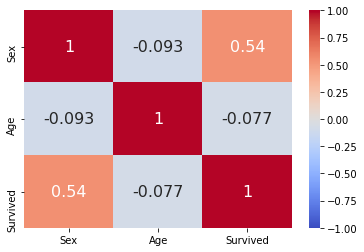

In [80]:
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size': 16})

***annot*** - отображение чисел

***cmap*** - цветовая схема

***vmin, vmax*** - пределы наших значений

